In [1]:
%pylab inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# A helper function to display the tree.
# NOTE: requires pydotplus and graphviz libraries. 
#       for MACOS/LINUX just install by typing "conda install pydotplus" at the terminal
#       for windows its tricker so we can skip this
    
from IPython.display import Image 
import pydotplus
def plot_tree(clf, feature_names, target_names):
    dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names= target_names,  
                             filled=True, rounded=True,  
                             special_characters=True) 
    return pydotplus.graph_from_dot_data(dot_data).create_png() 



# LOAD IRIS DATASET

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
feature_names = iris.feature_names
y = iris.target
class_labels = iris.target_names

Accuracy Training         : 0.98
Accuracy Cross Validation : 0.96 (+/- 0.09)


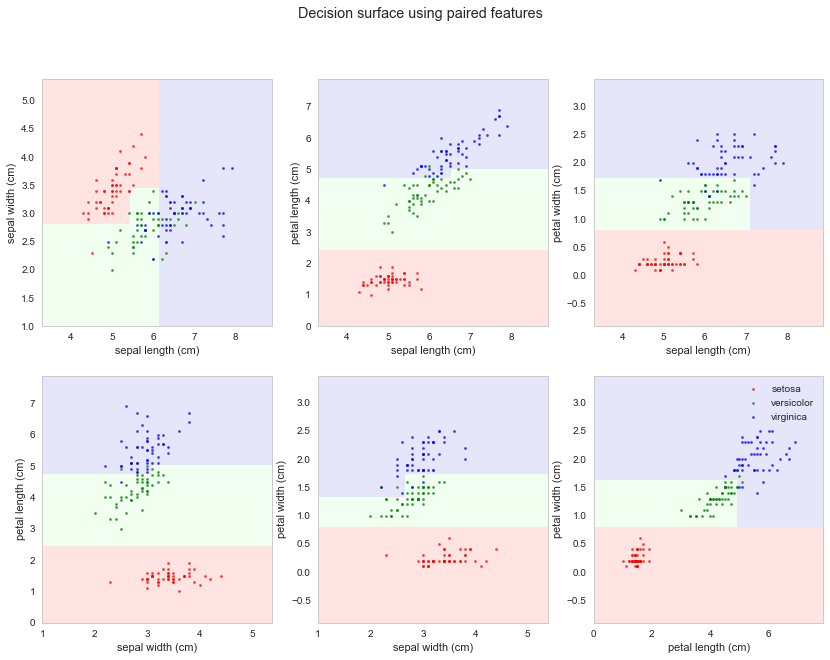

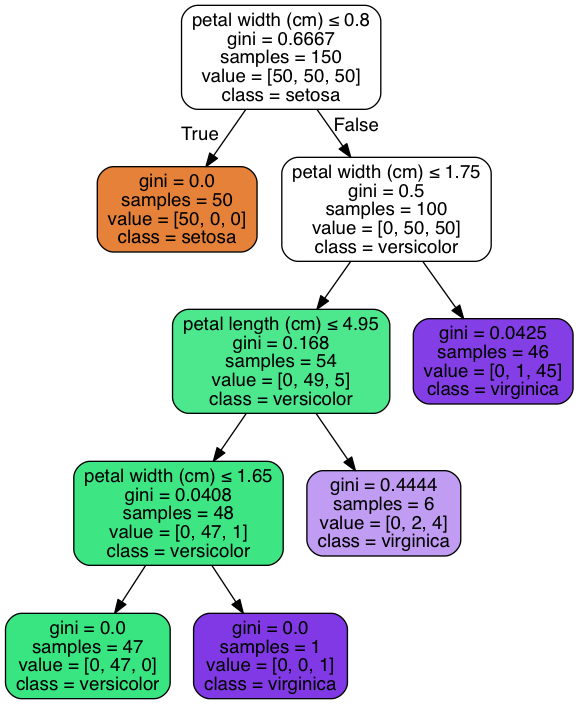

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)


# score at training
score_test = tree.fit(X,y).score(X, y)
print("Accuracy Training         :", score_test)

scores = cross_val_score(tree, X, y, cv=10)
print("Accuracy Cross Validation : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

plot_boundaries_iris_dataset(tree, iris)

# plot the tree
tree.fit(X,y)
Image(plot_tree(tree, iris.feature_names, iris.target_names))

Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=4, min_impurity_split=1e-07,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best score:  0.966666666667


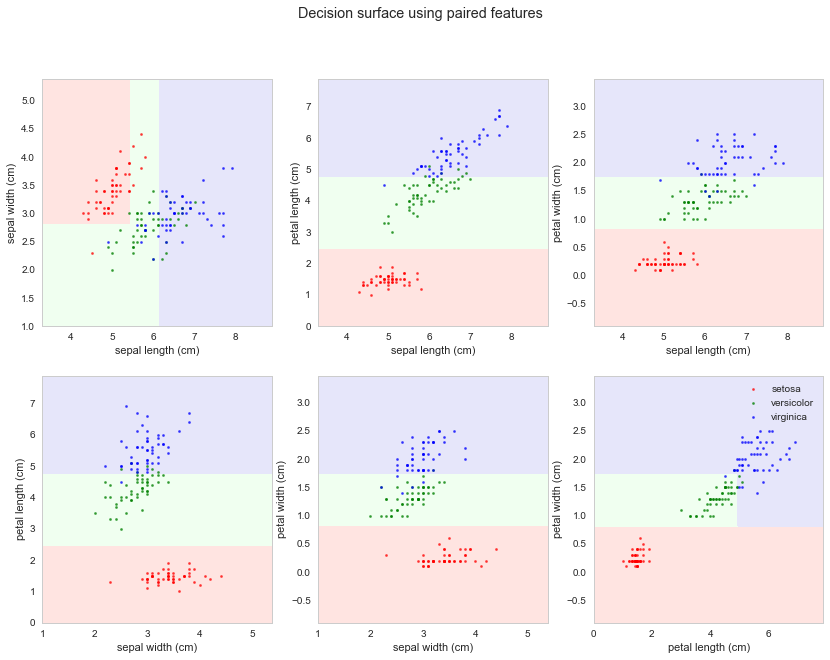

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,10)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

plot_boundaries_iris_dataset(grid.best_estimator_, iris)

## Feature importance

In [7]:
important_features = pd.Series(data=grid.best_estimator_.feature_importances_ , index=feature_names)
important_features.sort_values(ascending=False)

petal length (cm)    0.582851
petal width (cm)     0.417149
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64

# Random Forests

Accuracy: 0.97 (+/- 0.04)


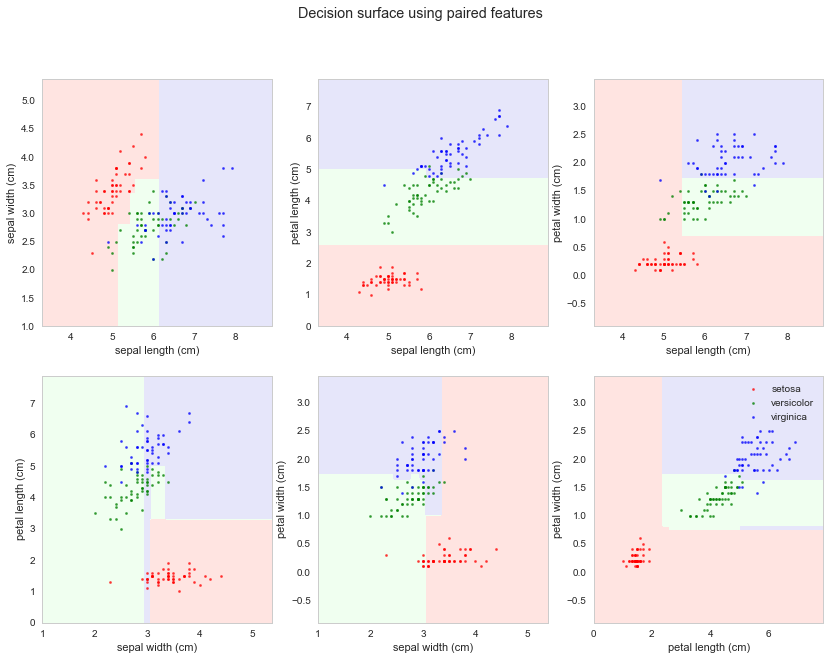

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of threes to grow
tree = RandomForestClassifier(max_leaf_nodes=4, n_estimators=4)
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)


plot_boundaries_iris_dataset(tree, iris)

# GradientBoostingClassifier

Accuracy: 0.96 (+/- 0.05)


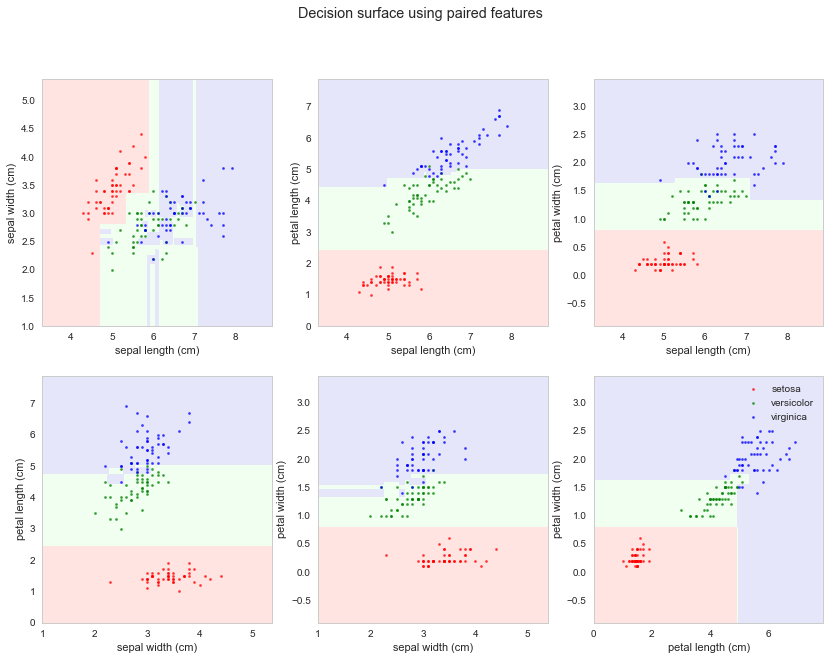

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier()
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

plot_boundaries_iris_dataset(tree, iris)

# Titanic

In [12]:
# Load the boston dataset from sklearn
dataset = pd.read_csv("../data/titanic_clean.csv")
X = dataset.drop('survived', axis = 1)
y = dataset.survived


# to print stats
feature_names = X.columns
class_labels = ["Died", "Survived"]

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           #'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,7)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)




Image(plot_tree(grid.best_estimator_, feature_names, class_labels))


Best parameters:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Best score:  0.795505617978


InvocationException: GraphViz's executables not found

In [14]:
important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

sex_male                   0.308922
fare                       0.246681
age                        0.238434
class                      0.111180
sibsp                      0.044980
parch                      0.020518
embark_town_Southampton    0.010703
embark_town_Cherbourg      0.008588
alone_True                 0.007486
embark_town_Queenstown     0.002508
dtype: float64

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

tree = GradientBoostingClassifier()
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)


Accuracy: 0.83 (+/- 0.04)


fare                       0.377787
age                        0.305300
sex_male                   0.133856
class                      0.064613
sibsp                      0.057396
embark_town_Queenstown     0.016672
parch                      0.015663
embark_town_Cherbourg      0.014653
embark_town_Southampton    0.014060
alone_True                 0.000000
dtype: float64

# Regression

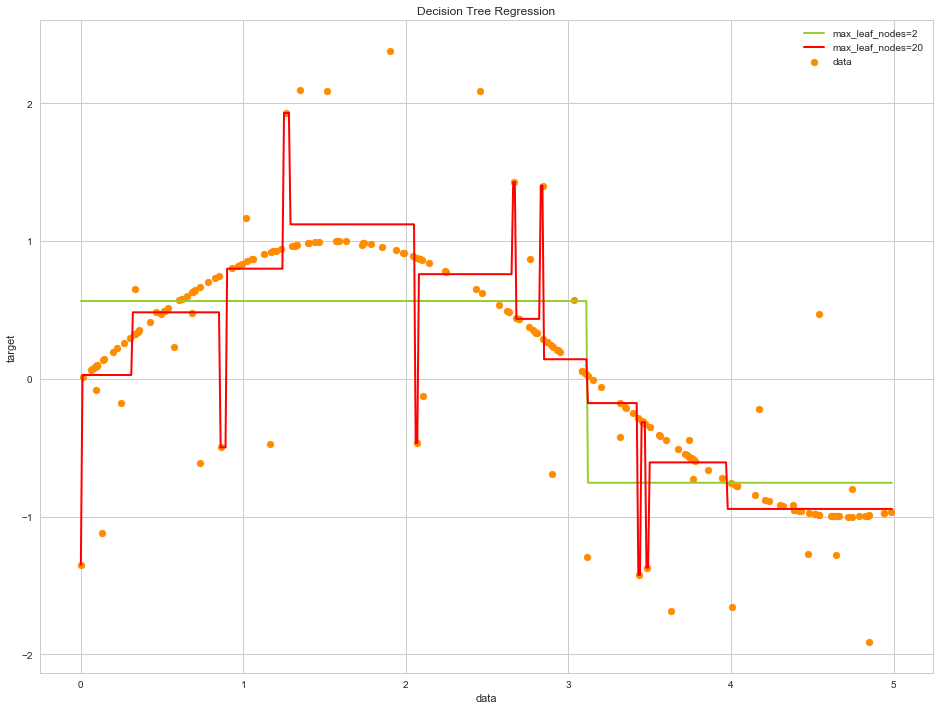

In [13]:
from sklearn.tree import DecisionTreeRegressor
pylab.rcParams['figure.figsize'] = 16, 12

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(40))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_leaf_nodes=2)
regr_1.fit(X, y)

num_leafs = 20
regr_2 = DecisionTreeRegressor(max_leaf_nodes=num_leafs)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="yellowgreen", label="max_leaf_nodes=2", linewidth=2)
plt.plot(X_test, y_2, color="red", label="max_leaf_nodes=%s"%num_leafs, linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

